In [9]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: wordcloud in c:\users\madhu\anaconda3\lib\site-packages (1.8.1)



You should consider upgrading via the 'C:\Users\Madhu\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
import requests   # Importing requests to extract content from a url

from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:

# creating empty reviews list 
oneplus_reviews=[]


for i in range(1,21):
  ip=[]  
  url="https://www.amazon.in/OnePlus-Display-Storage-4000mAH-Battery/product-reviews/B07HGJK535/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
  response = requests.get(url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  reviews = soup.find_all("span",attrs={"class","a-size-base review-text review-text-content"})# Extracting the content under specific tags  
  for i in range(len(reviews)):
    ip.append(reviews[i].text)  
 
  oneplus_reviews=oneplus_reviews+ip  # adding the reviews of one page to empty list which in future contains all the reviews

In [3]:

# writng reviews in a text file 
with open("oneplus.txt","w",encoding='utf8') as output:
    output.write(str(oneplus_reviews))
	

# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(oneplus_reviews)


In [4]:

import nltk
# from nltk.corpus import stopwords

# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ", ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ", ip_rev_string)

# words that contained in iphone XR reviews
ip_reviews_words = ip_rev_string.split(" ")


In [6]:

#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ip_reviews_words, use_idf=True,ngram_range=(1, 3))
X = vectorizer.fit_transform(ip_reviews_words)

with open("C:/Users/Madhu/Downloads/stopwords.txt","r") as sw:
    stop_words = sw.read()
    
stop_words = stop_words.split("\n")

stop_words.extend(["oneplus","mobile","time","android","phone","device","screen","battery","product","good","day","price"])


C:\Users\Madhu\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass input=['', 'the', 'same', 'thing', 'happening', 'in', 'the', 'new', 'replaced', 'phone', 'also', 'i', 'feel', 'disappointed', 'it', 's', 'not', 'worth', 'for', 'the', 'money', 'it', 's', 'hanging', 'a', 'lot', 'in', 'phone', 'application', 'i', 'am', 'getting', 'irritated', 'when', 'i', 'am', 'try', 'to', 'make', 'a', 'call', 'i', 'need', 'to', 'wait', 'for', 'to', 'seconds', 'in', 'that', 'to', 'most', 'of', 'the', 'time', 'it', 'closing', 'automatically', 'showing', 'phone', 'is', 'not', 'responding', 'i', 'didn', 't', 'expect', 'this', 'from', 'one', 'plus', 'totally', 'waste', 'product', 'your', 'browser', 'does', 'not', 'support', 'html', 'video', 'do', 'watch', 'the', 'video', 'm', 'very', 'disappointed', 'with', 'the', 'product', 'everything', 'is', 'best', 'except', 'the', 'thing', 'that', 'one', 'plus', 'hasn', 't', 'provided', 'headphones', 'with', 'handset', 'n', 'even', 'cleaning'

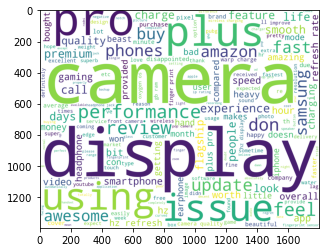

In [7]:
ip_reviews_words = [w for w in ip_reviews_words if not w in stop_words]

# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)

# WordCloud can be performed on the string inputs.
# Corpus level word cloud

wordcloud_ip = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)